## Wilcoxon rank-sum statistic for per-tissue evaluation

### Reading results files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pathlib import Path
from os import listdir

In [2]:
results_dir=Path("model_accuracies")
infiles=listdir(results_dir)
infiles

['Pytorch_results.tsv',
 'Keras_results.tsv',
 'XGB_results.tsv',
 'KNN_results.tsv',
 'SVM_ACCURACY_FILE.tsv']

In [15]:
df=pd.read_csv(results_dir/infiles[0],sep='\t')
for f in infiles[1:]:
    x=pd.read_csv(results_dir/f,sep='\t')
    name=x.columns[0]
    df[name]=x[name]

In [16]:
df

,Pytorch_Accuracy,Keras_Accuracy,XGB_Accuracy,KNN_Accuracy,SVM_accuracy
Adipose Tissue,0.3662,0.342535,0.337500,0.306250,0.350000
Blood Vessel,0.3959,0.299014,0.448905,0.342391,0.434783
Brain,0.3939,0.241692,0.530000,0.439394,0.402985
Breast,0.2857,0.303448,0.275862,0.186441,0.220339
Colon,0.3361,0.887574,0.450980,0.333333,0.382353
Esophagus,0.3969,0.252693,0.384365,0.307317,0.434146
Heart,0.3405,0.341667,0.488889,0.314050,0.413223
Lung,0.3322,0.325527,0.348837,0.360465,0.209302
Muscle,0.3426,0.331560,0.411765,0.307018,0.315789
Nerve,0.3218,0.314010,0.472000,0.226190,0.309524


In [17]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
grps = list(set(df.index.values))
grps
res_df=pd.DataFrame(columns=['statistic','p-value'])
keys=[]
for g1 in grps:
        for g2 in grps[grps.index(g1)+1:]:
            if g1 != g2:
                keys.append(str(g1+'_'+g2))
                x = list(df.loc[g1,:])
                y = list(df.loc[g2,:])
                res=mannwhitneyu(x,y,alternative='two-sided')
                res_df=res_df.append({'statistic':res[0],
                                        'p-value':res[1]},ignore_index=True)
res_df=res_df.set_index(pd.Index(keys,'Tissue'))
corrected_p_values=multipletests(res_df['p-value'])[1]
res_df['cor_p-value']=pd.Series(corrected_p_values,index=keys)
res_df=res_df.sort_values(by='cor_p-value')
df['Average Accuracy']=df.mean(axis=1)
df['sdev']=df.std(axis=1)

In [18]:
res_df.head(10)

,statistic,p-value,cor_p-value
Heart_Breast,25.0,0.012186,0.724003
Muscle_Breast,25.0,0.012186,0.724003
Adipose Tissue_Breast,25.0,0.012186,0.724003
Testis_Colon,0.0,0.012186,0.724003
Colon_Breast,25.0,0.012186,0.724003
Blood Vessel_Breast,24.0,0.021572,0.887047
Adipose Tissue_Testis,23.0,0.036714,0.975352
Testis_Heart,2.0,0.036714,0.975352
Nerve_Breast,22.0,0.060103,0.997552
Pancreas_Breast,22.0,0.060103,0.997552


In [19]:
df

,Pytorch_Accuracy,Keras_Accuracy,XGB_Accuracy,KNN_Accuracy,SVM_accuracy,Average Accuracy,sdev
Adipose Tissue,0.3662,0.342535,0.337500,0.306250,0.350000,0.340497,0.019682
Blood Vessel,0.3959,0.299014,0.448905,0.342391,0.434783,0.384199,0.056368
Brain,0.3939,0.241692,0.530000,0.439394,0.402985,0.401594,0.093324
Breast,0.2857,0.303448,0.275862,0.186441,0.220339,0.254358,0.043874
Colon,0.3361,0.887574,0.450980,0.333333,0.382353,0.478068,0.209138
Esophagus,0.3969,0.252693,0.384365,0.307317,0.434146,0.355084,0.065761
Heart,0.3405,0.341667,0.488889,0.314050,0.413223,0.379666,0.063780
Lung,0.3322,0.325527,0.348837,0.360465,0.209302,0.315266,0.054388
Muscle,0.3426,0.331560,0.411765,0.307018,0.315789,0.341746,0.037113
Nerve,0.3218,0.314010,0.472000,0.226190,0.309524,0.328705,0.079592


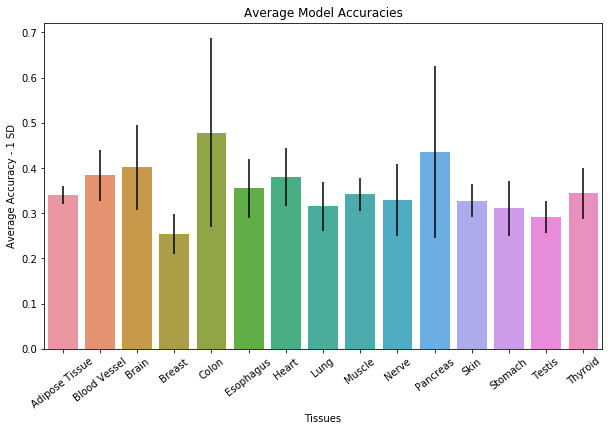

In [20]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=df.index.values,y=df['Average Accuracy'],
              yerr=df['sdev']*1, capsize=.2)
x=ax.set_title("Average Model Accuracies")
x=ax.set_xlabel("Tissues")
x=ax.set_ylabel("Average Accuracy - 1 SD")
x=ax.set_xticklabels(labels=df.index.values,rotation=38)
fig = ax.get_figure()
fig.savefig("plots/all_model_accuracy.png",dpi=100,bbox_inches = "tight")